In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('four_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

study_hours           0
attendance_percent    0
sleep_hours           0
previous_scores       0
final_exam_score      0
dtype: int64
['study_hours', 'attendance_percent', 'sleep_hours', 'previous_scores', 'final_exam_score']


In [5]:
x = df[['study_hours', 'attendance_percent', 'sleep_hours', 'previous_scores']].values.reshape(-1,4)
y = df['final_exam_score'].values.reshape(-1,1)

sc = MinMaxScaler()
x = sc.fit_transform(x)

yn = y.min()
yx = y.max()
y = (y-yn)/(yx-yn)
jb.dump(sc, 'scaler_four.pkl')

['scaler_four.pkl']

In [17]:
def score(study, attendance, sleep, previous):
    inp = np.array([[study, attendance, sleep, previous]], dtype=float)
    sc = jb.load('scaler_four.pkl')
    inp = sc.transform(inp)
    model_path = 'four.keras'
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(4,), activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x, y, epochs=200)
        lv = hist.history['loss']
        model.save('four.keras')
        pred = model.predict(x)
        
        plt.figure()
        plt.plot(lv)
        plt.title('Loss Values')
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        plt.title('Actual vs predicted')
        plt.scatter(y, pred, label= 'actual vs predicted', color='pink')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.grid(True)
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx - yn)+yn

Epoch 1/200


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3356
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2625
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1815
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1195
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0795
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0479
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0320 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0196
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0174
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0206
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0210
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0193
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0160
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0133
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0108
Epoch 16/200
4/4 ━━━━━━━━━━━━━

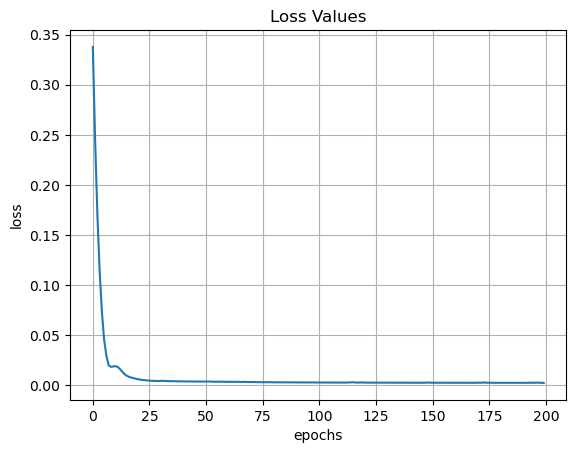

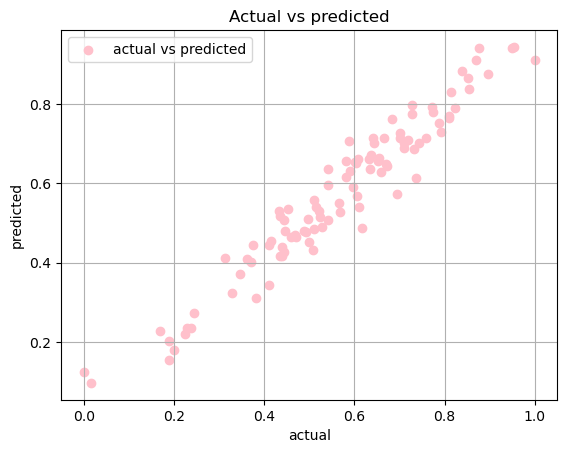

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
163.47742713787548


In [18]:
print(score(9,99, 3, 98))